In [58]:
# Import Libaries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns


In [2]:
# Import Operating System Command 

import os

In [3]:
# Creating data directory path 

data_dir = '/Users/mayowa/Documents/Data/Udemy/Tensor-flow/DATA/image_files/cell_images'

In [4]:
# check the folder

os.listdir(data_dir)

['.DS_Store', 'test', 'train']

In [5]:
# Create the test and train path 

train_path = data_dir + '/train/'
test_path = data_dir + '/test/'

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

#### Parasitized Image

In [10]:
## Gain Insight to the dataset and image 

os.listdir(train_path + 'parasitized')[2]

'C84P45ThinF_IMG_20150818_101226_cell_98.png'

In [21]:
# Saving one of the image into a varaibale 

para_cell = train_path + 'parasitized/' + 'C84P45ThinF_IMG_20150818_101226_cell_98.png'

In [22]:
para_cell

'/Users/mayowa/Documents/Data/Udemy/Tensor-flow/DATA/image_files/cell_images/train/parasitized/C84P45ThinF_IMG_20150818_101226_cell_98.png'

In [31]:
# import image to voew the image 

from tensorflow.keras.preprocessing import image

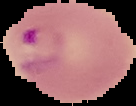

In [32]:
# viewing the image

image.load_img(para_cell)

In [30]:
imread(para_cell).shape

(106, 136, 3)

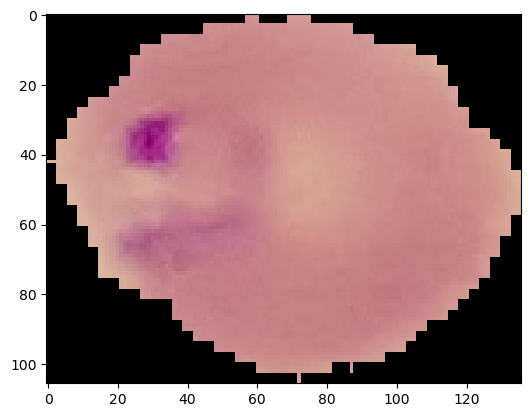

In [35]:
# Manual viewing the image

plt.imshow(imread(para_cell));   

###   Uninfected Image 

In [42]:
# Viewing the uninfected image list

os.listdir(train_path  + 'uninfected')[7]

'C142P103ThinF_IMG_20151005_223257_cell_18.png'

In [44]:
uninfected_cell = train_path +'uninfected/' +'C142P103ThinF_IMG_20151005_223257_cell_18.png'

In [45]:
uninfected_cell

'/Users/mayowa/Documents/Data/Udemy/Tensor-flow/DATA/image_files/cell_images/train/uninfected/C142P103ThinF_IMG_20151005_223257_cell_18.png'

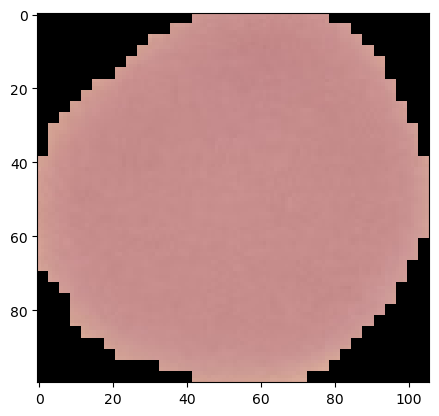

In [47]:
plt.imshow(imread(uninfected_cell))

Examine the Dimension of the images

In [56]:
# Checking the number of the images.  

len(os.listdir(test_path + 'parasitized'))

1300

In [62]:
# looping through the image file

dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'uninfected'):
    
    img = imread(test_path + 'uninfected/' + image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


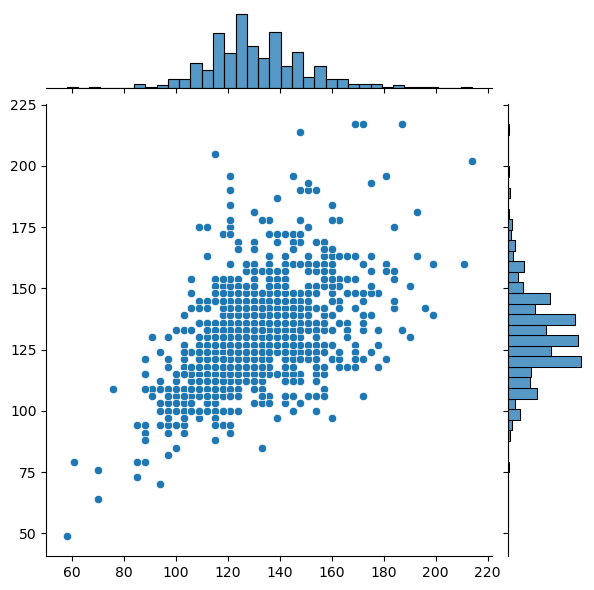

In [63]:
sns.jointplot(x = dim1, y = dim2)

In [64]:
# Checking the mean of dim1 and dim2

np.mean(dim1)

130.92538461538462

In [65]:
np.mean(dim2)

130.75

In [84]:
# Creating image shape

image_shape = (130, 130, 3)

## Image Manipulation 

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [73]:
image_gen = ImageDataGenerator(rotation_range = 20,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range = 0.1,
                               zoom_range = 0.1,
                               horizontal_flip = True, 
                               fill_mode = 'nearest')                

In [74]:
par_cell = imread(para_cell)

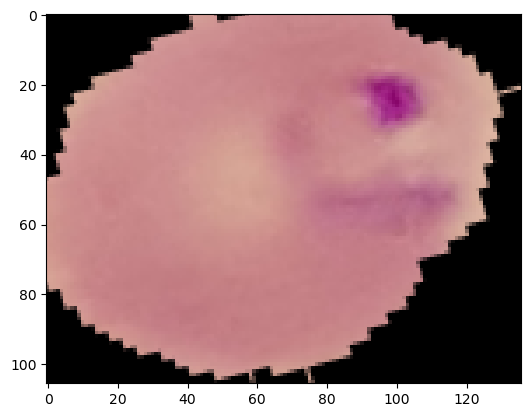

In [79]:
plt.imshow(image_gen.random_transform(par_cell));

### Set Up Directory Flow

In [80]:
batch_size = 10

In [90]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size = image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary')

Found 24958 images belonging to 2 classes.


In [96]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size = image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary',
                                                shuffle = False)

Found 2600 images belonging to 2 classes.


In [115]:
# Checking the label of the dataset

test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

### Build the model

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
# Creating call back instance 

ES = EarlyStopping(monitor = 'val_loss', patience = 5)

In [108]:
# Model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size =(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size =(2,2))) 


model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
                         


In [110]:
# Summary of the model 

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [120]:
model.fit(train_image_gen, epochs = 20, validation_data = test_image_gen, callbacks = [ES])

Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2496/2496 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - accuracy: 0.5376 - loss: 2.4279 - val_accuracy: 0.5808 - val_loss: 0.6774
Epoch 2/20
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 272s 109ms/step - accuracy: 0.5720 - loss: 0.6848 - val_accuracy: 0.5885 - val_loss: 0.6709
Epoch 3/20
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 87s 35ms/step - accuracy: 0.5875 - loss: 0.6744 - val_accuracy: 0.5704 - val_loss: 0.6767
Epoch 4/20
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 87s 35ms/step - accuracy: 0.6301 - loss: 0.6329 - val_accuracy: 0.9273 - val_loss: 0.2013
Epoch 5/20
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 88s 35ms/step - accuracy: 0.9322 - loss: 0.2112 - val_accuracy: 0.9346 - val_loss: 0.2042
Epoch 6/20
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 89s 36ms/step - accuracy: 0.9371 - loss: 0.2105 - val_accuracy: 0.9338 - val_loss: 0.2053
Epoch 7/20
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 797s 319ms/step - accuracy: 0.9413 - loss: 0.1944 - val_accuracy: 0.9346 - val_loss: 0.2002
Epoch 8/20
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - accuracy: 0.9457 - loss: 

In [121]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

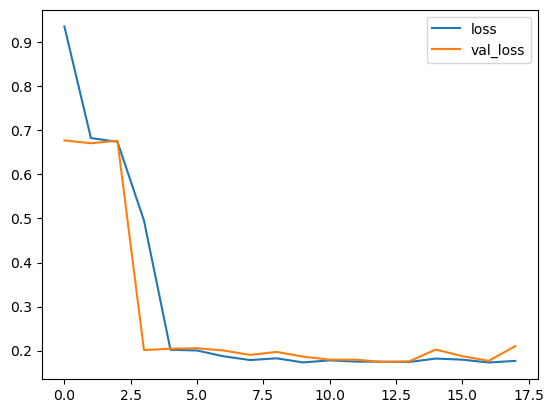

In [122]:
metrics[['loss', 'val_loss']].plot()

In [123]:
pred = model.predict(test_image_gen)

260/260 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step


In [124]:
prediction = pred > 0.5

In [125]:
prediction

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [128]:
from sklearn.metrics import classification_report

In [130]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [133]:
print(classification_report(test_image_gen.classes, prediction))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1300
           1       0.95      0.91      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



## Predict new image 

In [134]:
para_cell

'/Users/mayowa/Documents/Data/Udemy/Tensor-flow/DATA/image_files/cell_images/train/parasitized/C84P45ThinF_IMG_20150818_101226_cell_98.png'

In [136]:
new_image = image.load_img(para_cell, target_size = image_shape)

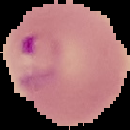

In [137]:
new_image

In [138]:
new_image_arr = image.img_to_array(new_image)

In [140]:
new_image_arr.shape

(130, 130, 3)

In [142]:
new_image_arr = np.expand_dims(new_image_arr, axis = 0)

In [143]:
new_pred = model.predict(new_image_arr) > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [144]:
new_pred

array([[False]])

In [145]:
model.save('malaria_dectective_model.keras')

In [146]:
threshold = 0.5
if new_pred > threshold:
    new_pred = 1
else:
    new_pred = 0

In [147]:
new_pred

0